In [1]:
# Add at the beginning of your script
import os
import tensorflow as tf

# Enable memory growth to avoid memory fragmentation
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# Set to use mixed precision (significant speedup on newer GPUs)
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Optional: Set TensorFlow to use only required memory
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4060 Laptop GPU, compute capability 8.9


In [2]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import sys
print("Python version:", sys.version)
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", len(tf.config.list_physical_devices('GPU')) > 0)
print("GPU Devices:", tf.config.list_physical_devices('GPU'))

Python version: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.10.0
GPU Available: True
GPU Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

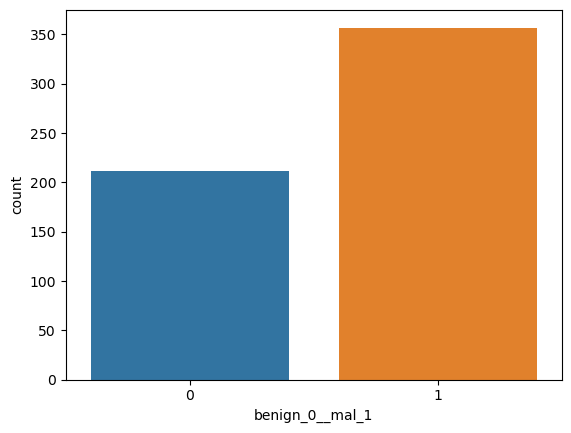

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

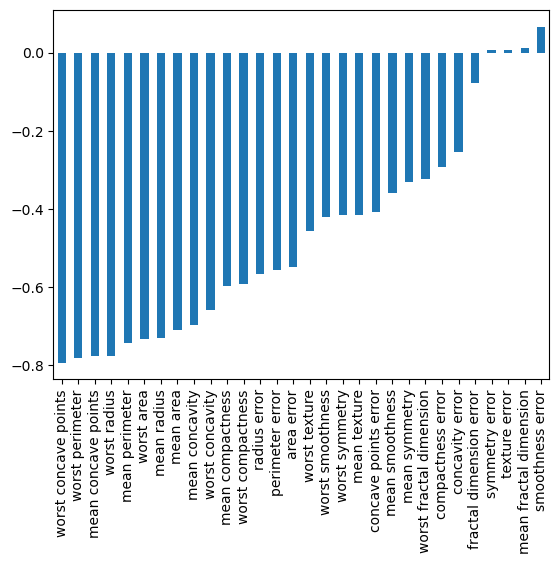

In [8]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

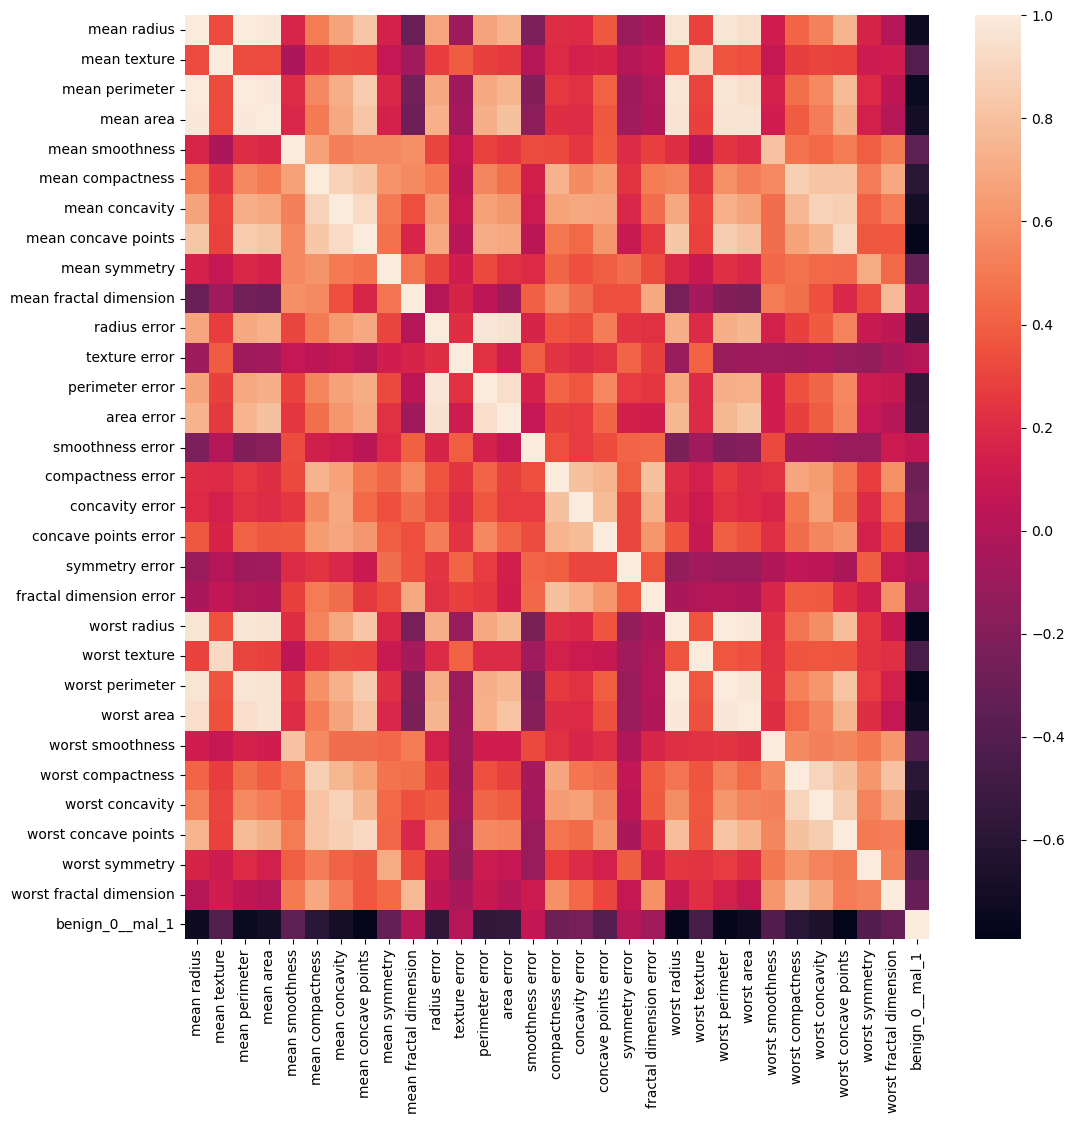

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [10]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [11]:
X = df.drop('benign_0__mal_1',axis=1).values

In [12]:
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.25)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense, Dropout

In [21]:
X_train.shape

(426, 30)

In [22]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [23]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 7s 44ms/step - loss: 0.6856 - val_loss: 0.6782
Epoch 2/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6638 - val_loss: 0.6586
Epoch 3/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6406 - val_loss: 0.6319
Epoch 4/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6103 - val_loss: 0.5977
Epoch 5/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5722 - val_loss: 0.5565
Epoch 6/600
14/14 [==============================] - 0s 16ms/step - loss: 0.5265 - val_loss: 0.5057
Epoch 7/600
14/14 [==============================] - 0s 16ms/step - loss: 0.4772 - val_loss: 0.4529
Epoch 8/600
14/14 [==============================] - 0s 16ms/step - loss: 0.4239 - val_loss: 0.4021
Epoch 9/600
14/14 [==============================] - 0s 15ms/step - loss: 0.3769 - val_loss: 0.3515
Epoch 10/600
14/14 [==============================] - 0s 15ms/step - loss: 0.3352 - val_loss: 0.3116

14/14 [==============================] - 0s 12ms/step - loss: 0.0532 - val_loss: 0.1006
Epoch 83/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0540 - val_loss: 0.1056
Epoch 84/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0506 - val_loss: 0.1034
Epoch 85/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0510 - val_loss: 0.1077
Epoch 86/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0514 - val_loss: 0.1045
Epoch 87/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0536 - val_loss: 0.1048
Epoch 88/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0528 - val_loss: 0.1030
Epoch 89/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0526 - val_loss: 0.1034
Epoch 90/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0503 - val_loss: 0.1101
Epoch 91/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0504 - val_loss: 0.1048
Epo

14/14 [==============================] - 0s 14ms/step - loss: 0.0409 - val_loss: 0.1226
Epoch 163/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0399 - val_loss: 0.1284
Epoch 164/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0394 - val_loss: 0.1342
Epoch 165/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0514 - val_loss: 0.1161
Epoch 166/600
14/14 [==============================] - 0s 20ms/step - loss: 0.0428 - val_loss: 0.1380
Epoch 167/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0420 - val_loss: 0.1404
Epoch 168/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0399 - val_loss: 0.1243
Epoch 169/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0396 - val_loss: 0.1237
Epoch 170/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0419 - val_loss: 0.1365
Epoch 171/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0392 - val_loss: 0

14/14 [==============================] - 0s 15ms/step - loss: 0.0296 - val_loss: 0.1486
Epoch 243/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0306 - val_loss: 0.1500
Epoch 244/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0331 - val_loss: 0.1466
Epoch 245/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0314 - val_loss: 0.1568
Epoch 246/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0307 - val_loss: 0.1509
Epoch 247/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0299 - val_loss: 0.1671
Epoch 248/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0310 - val_loss: 0.1532
Epoch 249/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0320 - val_loss: 0.1539
Epoch 250/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0292 - val_loss: 0.1520
Epoch 251/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0288 - val_loss: 0

14/14 [==============================] - 0s 15ms/step - loss: 0.0220 - val_loss: 0.1814
Epoch 323/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0222 - val_loss: 0.1633
Epoch 324/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0237 - val_loss: 0.1665
Epoch 325/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0228 - val_loss: 0.1726
Epoch 326/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0219 - val_loss: 0.1713
Epoch 327/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0219 - val_loss: 0.1629
Epoch 328/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0263 - val_loss: 0.2337
Epoch 329/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0261 - val_loss: 0.1562
Epoch 330/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0257 - val_loss: 0.1976
Epoch 331/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0209 - val_loss: 0

14/14 [==============================] - 0s 14ms/step - loss: 0.0296 - val_loss: 0.1914
Epoch 403/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0281 - val_loss: 0.1947
Epoch 404/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0250 - val_loss: 0.2442
Epoch 405/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0193 - val_loss: 0.1947
Epoch 406/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0154 - val_loss: 0.2128
Epoch 407/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0159 - val_loss: 0.1897
Epoch 408/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0164 - val_loss: 0.2265
Epoch 409/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0153 - val_loss: 0.2004
Epoch 410/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0149 - val_loss: 0.2112
Epoch 411/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0150 - val_loss: 0

14/14 [==============================] - 0s 17ms/step - loss: 0.0096 - val_loss: 0.2425
Epoch 483/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0106 - val_loss: 0.2963
Epoch 484/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0126 - val_loss: 0.2382
Epoch 485/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0119 - val_loss: 0.2579
Epoch 486/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0104 - val_loss: 0.2612
Epoch 487/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0106 - val_loss: 0.2573
Epoch 488/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0100 - val_loss: 0.2522
Epoch 489/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0106 - val_loss: 0.2784
Epoch 490/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0113 - val_loss: 0.2495
Epoch 491/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0109 - val_loss: 0

14/14 [==============================] - 0s 13ms/step - loss: 0.0082 - val_loss: 0.2797
Epoch 563/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0111 - val_loss: 0.3598
Epoch 564/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0153 - val_loss: 0.3834
Epoch 565/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0102 - val_loss: 0.2914
Epoch 566/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0079 - val_loss: 0.3217
Epoch 567/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0078 - val_loss: 0.2954
Epoch 568/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0062 - val_loss: 0.3421
Epoch 569/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0101 - val_loss: 0.3416
Epoch 570/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0109 - val_loss: 0.3138
Epoch 571/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0128 - val_loss: 0

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses

,loss,val_loss
0,0.685636,0.678233
1,0.663774,0.658630
2,0.640552,0.631904
3,0.610258,0.597707
4,0.572220,0.556507
...,...,...
595,0.006977,0.353568
596,0.005679,0.340522
597,0.005672,0.323353
598,0.007081,0.385960


<Axes: >

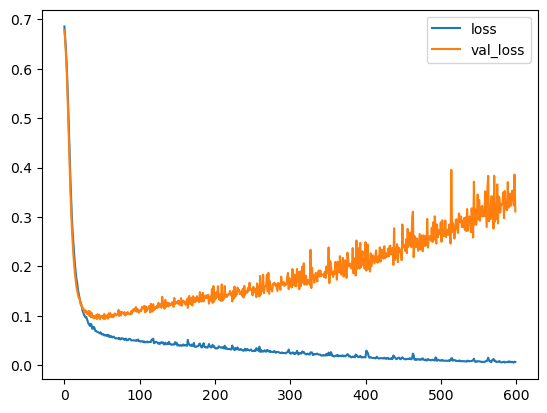

In [26]:
losses.plot()

In [27]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)#restore_best_weights=True

In [31]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 33ms/step - loss: 0.6832 - val_loss: 0.6630
Epoch 2/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6454 - val_loss: 0.6295
Epoch 3/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6086 - val_loss: 0.5895
Epoch 4/600
14/14 [==============================] - 0s 16ms/step - loss: 0.5633 - val_loss: 0.5383
Epoch 5/600
14/14 [==============================] - 0s 18ms/step - loss: 0.5140 - val_loss: 0.4864
Epoch 6/600
14/14 [==============================] - 0s 15ms/step - loss: 0.4631 - val_loss: 0.4348
Epoch 7/600
14/14 [==============================] - 0s 14ms/step - loss: 0.4137 - val_loss: 0.3856
Epoch 8/600
14/14 [==============================] - 0s 15ms/step - loss: 0.3676 - val_loss: 0.3356
Epoch 9/600
14/14 [==============================] - 0s 14ms/step - loss: 0.3258 - val_loss: 0.2941
Epoch 10/600
14/14 [==============================] - 0s 14ms/step - loss: 0.2958 - val_loss: 0.2641

14/14 [==============================] - 0s 14ms/step - loss: 0.0526 - val_loss: 0.0949
Epoch 83/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0533 - val_loss: 0.0936
Epoch 84/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0552 - val_loss: 0.0951
Epoch 85/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0538 - val_loss: 0.0928
Epoch 86/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0558 - val_loss: 0.0910
Epoch 87/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0539 - val_loss: 0.1007
Epoch 88/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0544 - val_loss: 0.0945
Epoch 89/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0514 - val_loss: 0.0924
Epoch 90/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0543 - val_loss: 0.0986
Epoch 91/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0519 - val_loss: 0.0909
Epo

In [32]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

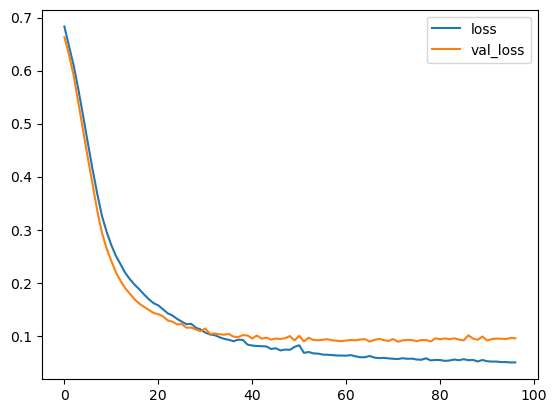

In [33]:
model_loss.plot()

In [34]:
from tensorflow.keras.layers import Dropout

In [35]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [36]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 32ms/step - loss: 0.7087 - val_loss: 0.6842
Epoch 2/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6859 - val_loss: 0.6745
Epoch 3/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6819 - val_loss: 0.6659
Epoch 4/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6566 - val_loss: 0.6557
Epoch 5/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6473 - val_loss: 0.6349
Epoch 6/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6322 - val_loss: 0.6088
Epoch 7/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6127 - val_loss: 0.5832
Epoch 8/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5859 - val_loss: 0.5510
Epoch 9/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5723 - val_loss: 0.5195
Epoch 10/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5666 - val_loss: 0.4893

14/14 [==============================] - 0s 15ms/step - loss: 0.0985 - val_loss: 0.0846
Epoch 83/600
14/14 [==============================] - 0s 14ms/step - loss: 0.1189 - val_loss: 0.0803
Epoch 84/600
14/14 [==============================] - 0s 17ms/step - loss: 0.1070 - val_loss: 0.0849
Epoch 85/600
14/14 [==============================] - 0s 15ms/step - loss: 0.1262 - val_loss: 0.1111
Epoch 86/600
14/14 [==============================] - 0s 14ms/step - loss: 0.1102 - val_loss: 0.0820
Epoch 87/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0957 - val_loss: 0.0780
Epoch 88/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0962 - val_loss: 0.0812
Epoch 89/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0928 - val_loss: 0.0872
Epoch 90/600
14/14 [==============================] - 0s 16ms/step - loss: 0.1013 - val_loss: 0.0826
Epoch 91/600
14/14 [==============================] - 0s 18ms/step - loss: 0.1285 - val_loss: 0.0853
Epo

In [37]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

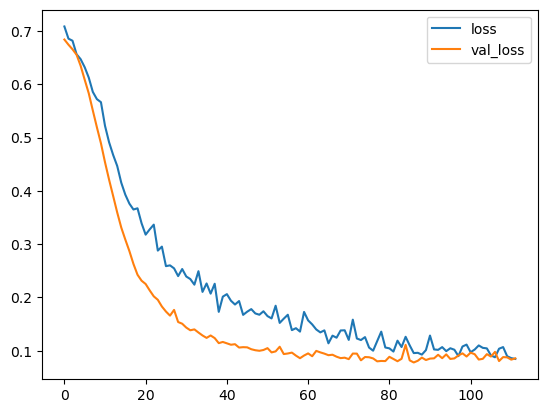

In [38]:
model_loss.plot()

In [39]:
pred_prob = model.predict(X_test)
predictions = (pred_prob > 0.5).astype(int)

5/5 [==============================] - 0s 4ms/step


In [40]:
predictions = predictions.flatten()

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [43]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
